In [334]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from PIL import Image
sns.set()

In [335]:
data = pd.read_csv('disthistogram', header=0 , delimiter='\t', names=['Harmonic','Arithmetic','Geometric','VeinOrder','NN VeinOrder','v2x','v2y','vx','vy','v2width','vwidth'])
ven = pd.read_csv('venconnections', delimiter='\t')
ven2 = pd.read_csv('ven2connections', delimiter='\t')
im = Image.open('conprofile.png','r')
im2 = Image.open('covgrad.png','r')

x = data.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled, columns=data.columns)

In [336]:
ven.head()

,startx,starty,endx,endy,disttoroot
0,33.1149,41.7500,33.8492,41.4523,385.736
1,32.7975,41.0104,33.1149,41.7500,377.393
2,32.3718,40.3123,32.7975,41.0104,368.410
3,31.7323,39.7819,32.3718,40.3123,359.743
4,31.0017,39.3583,31.7323,39.7819,351.147


In [341]:
ven.iloc[:,4].std()

154.18459357956678

In [342]:
data.iloc[0][5:9:2]

v2x    23.4994
vx     22.6549
Name: 0, dtype: float64

In [343]:
data.iloc[0][6:9:2]

v2y    43.5266
vy     40.2965
Name: 0, dtype: float64

In [344]:
cols = list(data.columns[1:7])
cols += list(data.columns[9:])

In [345]:
countdf = data.groupby(['vx','vy']).agg('count').drop(cols,axis=1).rename(columns={'Harmonic':'count'})
countdf.head(5)
#countdf.index

,,count
vx,vy,
3.33456,30.8969,4
3.42533,31.6841,45
3.53948,30.1186,8
3.72002,29.3212,7
3.94487,28.4617,9


In [346]:
copycountdf = countdf.copy()
#copycountdf['vx','vy'] = copycountdf.index
copycountdf.reset_index(level=0, inplace=True)
copycountdf.reset_index(level=0, inplace=True)

In [347]:
copycountdf.head(5)

,vy,vx,count
0,30.8969,3.33456,4
1,31.6841,3.42533,45
2,30.1186,3.53948,8
3,29.3212,3.72002,7
4,28.4617,3.94487,9


In [348]:
cdata = data.copy()

In [349]:
data = pd.merge(cdata,copycountdf,on=['vx','vy'])

Gerando um grafo a partir dos nodos das venações. Preciso encontrar uma representação que explique os dados que encontrei no outro notebook (picos que aparecem na derivada temporal da cobertura). Figura mostrada abaixo.

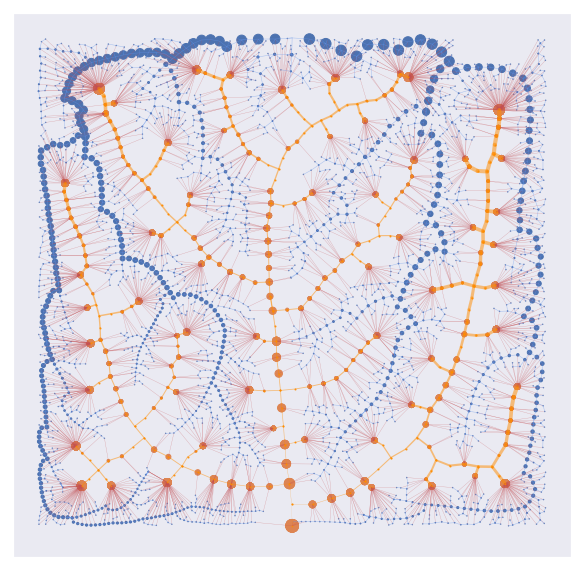

In [350]:
# @hidden_cell
fig = plt.figure(figsize=(10,10))
plt.scatter(data['v2x'],data['v2y'],s=np.power(10*np.array(data['v2width']),1.79))
plt.scatter(data['vx'],data['vy'],s=data['count']+np.power(3*np.array(data['vwidth']),2.82))
for i in range(data.shape[0]):
    plt.plot(data.iloc[i][5:9:2],data.iloc[i][6:9:2],'-r',linewidth=0.3,alpha=0.5)
for i in range(ven.shape[0]):
    plt.plot(ven.iloc[i][0:4:2],ven.iloc[i][1:4:2],'-o',c='darkorange',markersize=1,linewidth=ven.iloc[i][4]/ven.iloc[:,4].std(),alpha=0.5)
for i in range(ven2.shape[0]):
    plt.plot(ven2.iloc[i][0:4:2],ven2.iloc[i][1:4:2],'-',c='cornflowerblue',linewidth=0.5,alpha=0.5)
plt.xticks([])
plt.yticks([])
plt.show()

O grafo acima precisa de alguma forma representar o que vemos abaixo, o resultado da simulação.

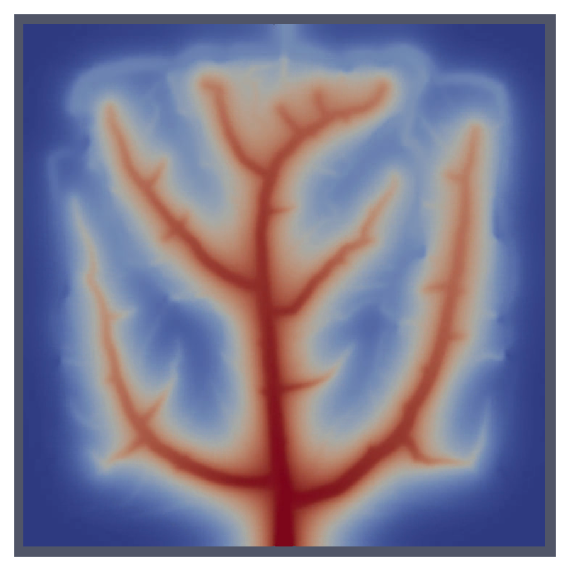

In [228]:
fig = plt.figure(figsize=(10,10))
plt.imshow(np.asarray(im))
plt.xticks([])
plt.yticks([])
plt.show()

Os picos que vemos abaixo são "bursts" no qual há um aumento grande na cobertura do corante. Provavelmente tem a ver com os nodos mais importantes da venação.

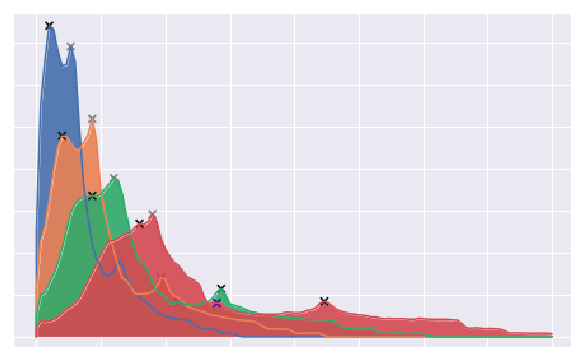

In [304]:
fig = plt.figure(figsize=(10,7))
plt.imshow(np.asarray(im2))
plt.xticks([])
plt.yticks([])
plt.show()

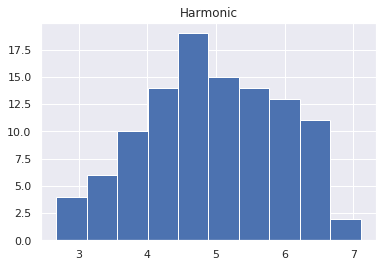

In [14]:
data.groupby(['VeinOrder','NN VeinOrder']).get_group((2,3)).drop(['VeinOrder','Geometric','Arithmetic','NN VeinOrder'],axis=1).hist(bins=10)
#plt.xlim(1,6)
plt.show()
#data['NN VeinOrder'].hist(bins=10)
#plt.xlim(1,5)
#plt.show()

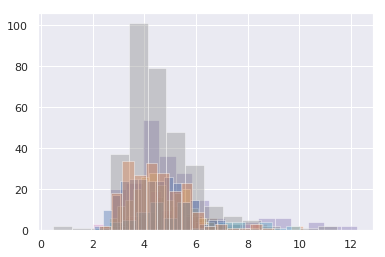

In [19]:
for i in range(1,5):
    for j in range(1,4):
        df = data.groupby(['VeinOrder','NN VeinOrder']).get_group((i,j)).drop(['VeinOrder','Geometric','Arithmetic','NN VeinOrder'],axis=1)
        sns.distplot(df, bins=15,hist=True, kde=False, rug=False)

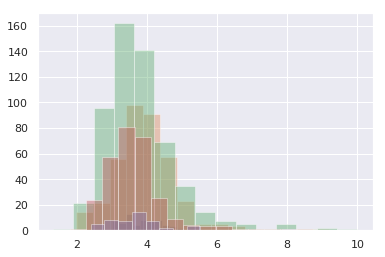

In [100]:
for i in range(1,6):
    df = data.groupby('VeinOrder').get_group(i).drop(['VeinOrder','Geometric','Arithmetic','NN VeinOrder'],axis=1)
    sns.distplot(df, bins=15,hist=True, kde=False, rug=False)



In [53]:
data.describe()

,Harmonic,Arithmetic,Geometric,VeinOrder,NN VeinOrder
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.00000
mean,3.814889,4.091761,3.949626,2.908887,2.45183
std,0.950355,0.956059,0.949267,0.920163,0.77693
min,1.324530,1.804050,1.637970,1.000000,1.00000
25%,3.195470,3.515505,3.372795,2.000000,2.00000
50%,3.683680,3.983070,3.827150,3.000000,2.00000
75%,4.198680,4.506980,4.352100,3.500000,3.00000
max,9.997340,9.997340,9.997340,6.000000,4.00000


In [49]:
data.head()

,Harmonic,Arithmetic,Geometric,VeinOrder,NN VeinOrder
0,4.67798,4.72853,4.70258,2,2
1,4.64436,4.64436,4.64436,1,3
2,2.68025,3.43605,3.09173,2,2
3,4.92177,4.94629,4.93402,1,3
4,3.91793,4.11680,4.01123,3,2


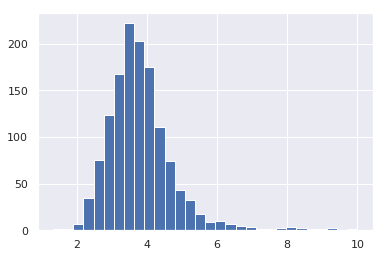

In [91]:
data['Harmonic'].hist(bins=30)
plt.show()


In [22]:
data.mean()

Distances Histogram    3.814889
dtype: float64

In [23]:
data.describe()

,Distances Histogram
count,1339.000000
mean,3.814889
std,0.950355
min,1.324530
25%,3.195470
50%,3.683680
75%,4.198680
max,9.997340


In [24]:
data.median()

Distances Histogram    3.68368
dtype: float64

In [28]:
data.kurtosis()

Distances Histogram    6.198549
dtype: float64

In [29]:
data.skew()

Distances Histogram    1.737346
dtype: float64